In [1]:
from scipy import stats
from scipy import optimize

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set(style="whitegrid")

# 통계 및 확률

In [5]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)

3.1

In [6]:
np.median(x)

3.0

In [7]:
x.min(), x.max()

(0.9, 6.7)

In [8]:
x.var()

3.0700000000000007

In [10]:
x.std()

1.7521415467935233

In [11]:
x.var(ddof=1)  # 표본의 분산과 표준편차의 불편 추정값을 계산하려면 ddof=1로 설정

3.5085714285714293

In [12]:
x.std(ddof=1)

1.8731181032095732

# 랜덤 수

In [13]:
np.random.rand()

0.5828296779352521

In [14]:
np.random.randn()

0.24313159089958986

In [15]:
np.random.rand(5)

array([0.55876007, 0.97029745, 0.90210264, 0.16591867, 0.56548724])

In [16]:
np.random.randn(2, 4)

array([[ 1.62199897, -0.10165032, -0.0553484 , -1.75655479],
       [ 0.50938131,  1.32270623,  0.43588382,  1.57627467]])

In [17]:
np.random.randint(10, size=10)

array([7, 1, 5, 9, 2, 9, 1, 9, 6, 3])

In [18]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[19, 17, 11, 14, 11, 15, 11, 14, 15, 16],
       [19, 12, 17, 10, 13, 13, 14, 11, 14, 18]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

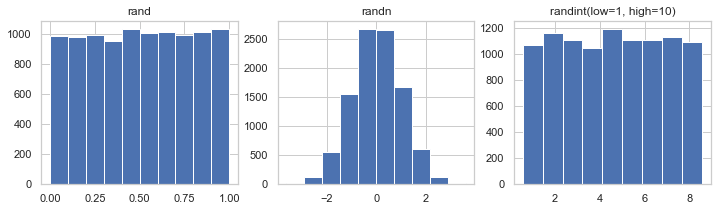

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

In [20]:
np.random.choice(10, 5, replace=False)  # 0~10까지의 정수 집합에서 5개의 고유한(복원x) 항목 추출

array([5, 6, 0, 9, 8])

In [21]:
np.random.seed(123456789)  # 항상 동일한 랜덤 수 생성
np.random.rand()

0.532833024789759

In [22]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [24]:
prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [25]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [26]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [27]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [28]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [29]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

# 확률 변수 및 분포

In [30]:
X = stats.norm(1, 0.5)  # 평균 1.0, 표준편차 0.5인 정규분포 확률 변수 생성

In [31]:
X.mean()

1.0

In [32]:
X.median()

1.0

In [33]:
X.std()

0.5

In [34]:
X.var()

0.25

In [35]:
[X.moment(n) for n in range(5)]  # 임의 차수의 비중심 모멘트 계산

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [36]:
X.stats()  # 정규분포 확률 변수에 대한 평균, 분산

(array(1.), array(0.25))

In [37]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [38]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [39]:
X.interval(0.95)  # 확률 분포에서 지정한 비율이 구간 내에 들어가도록 상한, 하한값 계산

(0.020018007729972975, 1.979981992270027)

In [40]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [41]:
def plot_rv_distribution(X, axes=None):
    """주어진 확률 변수에 대한 PDF, CDF, SF, PPF 도식화"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # 이산 확률 변수에는 pdf 메서드가 없으므로 그 대신 pmf를 사용한다.
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()

Text(0, 0.5, 'Poisson dist.')

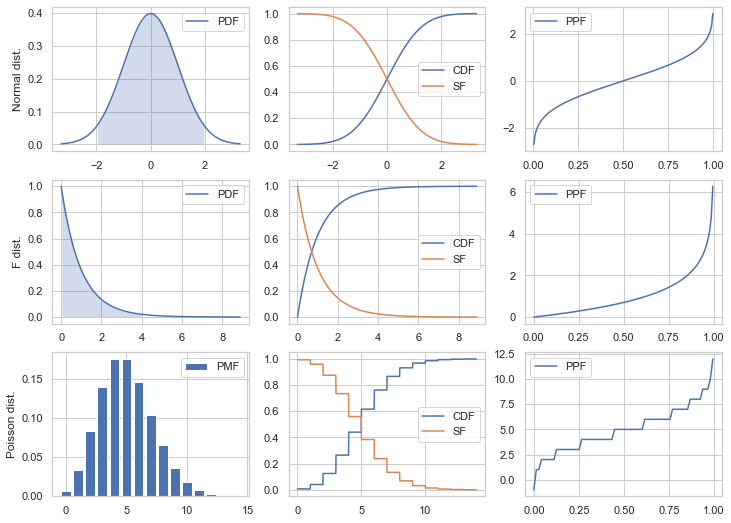

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

In [43]:
stats.norm.stats(loc=2, scale=0.5)  # 분포 매개변수를 인수로 전달

(array(2.), array(0.25))

In [44]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [45]:
X = stats.norm(1, 0.5)
X.rvs(10)  # 랜덤 수 추출

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

In [53]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ 연속 확률 변수 표본의 PDF와 히스토그램 도식화 """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", density=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

<AxesSubplot:title={'center':'exponential dist.'}>

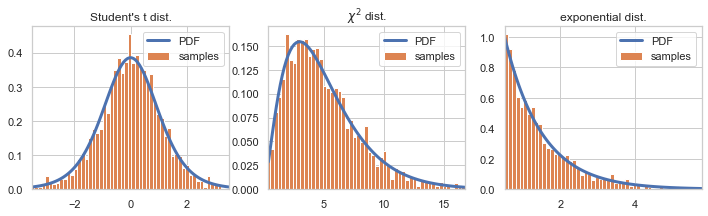

In [54]:
# 2000개 랜덤 표본의 히스토그램과 확률 분포 함수 비교
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# 스튜던트-t 분포
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
# 카이-제곱 분포
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# 지수 분포
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

In [55]:
# 자유도가 5인 x^2 분포에서 랜덤 표본 추출 후 재적합화
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.801053479405555, -0.04564076301669803, 1.084205273556519)

In [56]:
# 주어진 데이터로 최대 우도 매개변수를 반환해 새로운 확률 변수 인스턴스 생성
Y = stats.chi2(df=df, loc=loc, scale=scale)

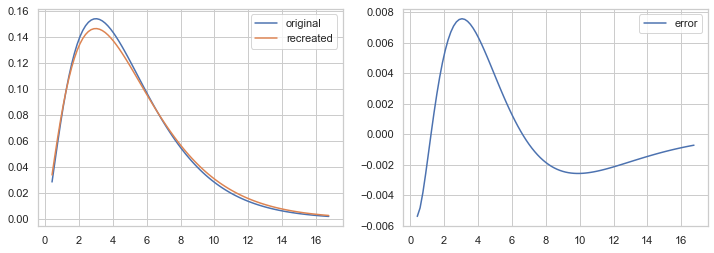

In [57]:
# X와 Y의 확률 분포는 유사해야 함
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

# 가설 검정

##### 확률 변수 X의 평균이 1이라는 귀무 가설

In [58]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)  # 랜덤 표본 추출

In [59]:
# 검정 통계량 계산(표준편차를 알고 있을 때)
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))  
z

-3.496030307381053

In [61]:
# 검정 통계량 계산(표본 표준편차 대신 사용)
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-3.684085943061155

In [62]:
# 정규 분포 확률 변수 나타내고 유의 수준 5%에 대한 임계값 계산
stats.norm().ppf(0.025)

-1.9599639845400545

In [63]:
# p-값 계산
2 * stats.norm().cdf(-abs(z))

0.00047223505995447053

In [64]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.00037438520460210867

In [66]:
# 검정 통계량과 p-값 바로 계산 가능한 함수
t, p = stats.ttest_1samp(X_samples, mu)

In [67]:
t

0.5310788228541355

In [68]:
p

0.5965536388591766

C:\Users\RENTALHUB-HP360\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


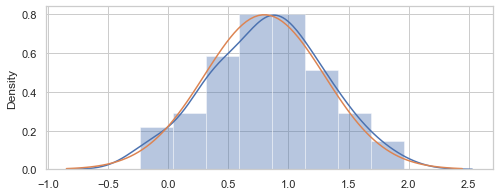

In [69]:
# 귀무 가설과 표본 데이터 비교
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

##### 2개의 확률 변수의 모집단 평균이 동일하다는 귀무 가설

In [72]:
# 각 확률 변수별 50개 표본 추출
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

In [73]:
# 검정 통계량과 p-값 계산
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [74]:
t

2.2462558367583916

In [75]:
p

0.02693248603080297

In [76]:
mu1, mu2

(0.3373322386573089, 0.024237214911691285)

# 비매개변수 기법

In [77]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)

In [78]:
# KDE 값 계산
kde = stats.kde.gaussian_kde(X_samples)

In [79]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25) 

C:\Users\RENTALHUB-HP360\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

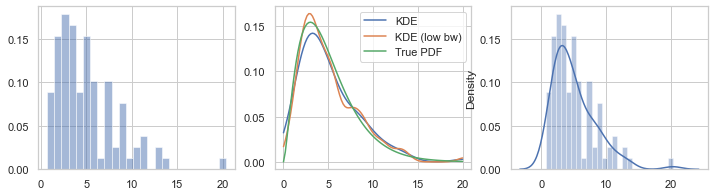

In [81]:
# 실제 확률 분포 함수 히스토그램과 커널 밀도 추정 값 비교
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(X_samples, density=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

In [82]:
# KDE가 주어지면 새로운 랜덤 수 생성
kde.resample(10)

array([[9.21653904, 3.61757193, 9.20408966, 1.83222062, 2.8338486 ,
        8.47407322, 0.5518062 , 1.30545163, 3.08507795, 3.83004303]])

In [83]:
# 1차원 KDE의 경우 커널 밀도 추정값을 적분할 수 있는 메서드를 통해 CDF 계산
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [84]:
# 역함수인 PPF 계산
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]
kde_ppf = np.vectorize(_kde_ppf)

In [85]:
# 대략 90% 신뢰구간 계산 
kde_ppf([0.05, 0.95])

array([ 0.58393968, 11.76040624])